In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('adult.csv')


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [8]:
data[['race', 'gender']].value_counts()

race                gender
White               Male      28735
                    Female    13027
Black               Male       2377
                    Female     2308
Asian-Pac-Islander  Male       1002
                    Female      517
Amer-Indian-Eskimo  Male        285
Other               Male        251
Amer-Indian-Eskimo  Female      185
Other               Female      155
Name: count, dtype: int64

In [9]:
# Targer Variable -> Income . Binary encoding target variable
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
data['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [13]:
# ONE-HOT-ENCODING Categorical Variables
data = data.join(pd.get_dummies(data['workclass'], prefix='workclass').map(lambda x: 1 if x==True else 0)).drop('workclass', axis=1)

In [15]:
data = data.join(pd.get_dummies(data['education'], prefix='education').map(lambda x: 1 if x==True else 0)).drop('education', axis=1)

In [16]:
data = data.join(pd.get_dummies(data['marital-status'], prefix='marital-status').map(lambda x: 1 if x==True else 0)).drop('marital-status', axis=1)
data = data.join(pd.get_dummies(data['race'], prefix='race').map(lambda x: 1 if x==True else 0)).drop('race', axis=1)
data = data.join(pd.get_dummies(data['occupation'], prefix='occupation').map(lambda x: 1 if x==True else 0)).drop('occupation', axis=1)
data = data.join(pd.get_dummies(data['relationship'], prefix='relationship').map(lambda x: 1 if x==True else 0)).drop('relationship', axis=1)

In [18]:
data = data.join(pd.get_dummies(data['native-country'], prefix='native-country').map(lambda x: 1 if x==True else 0)).drop('native-country', axis=1)

In [19]:
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)

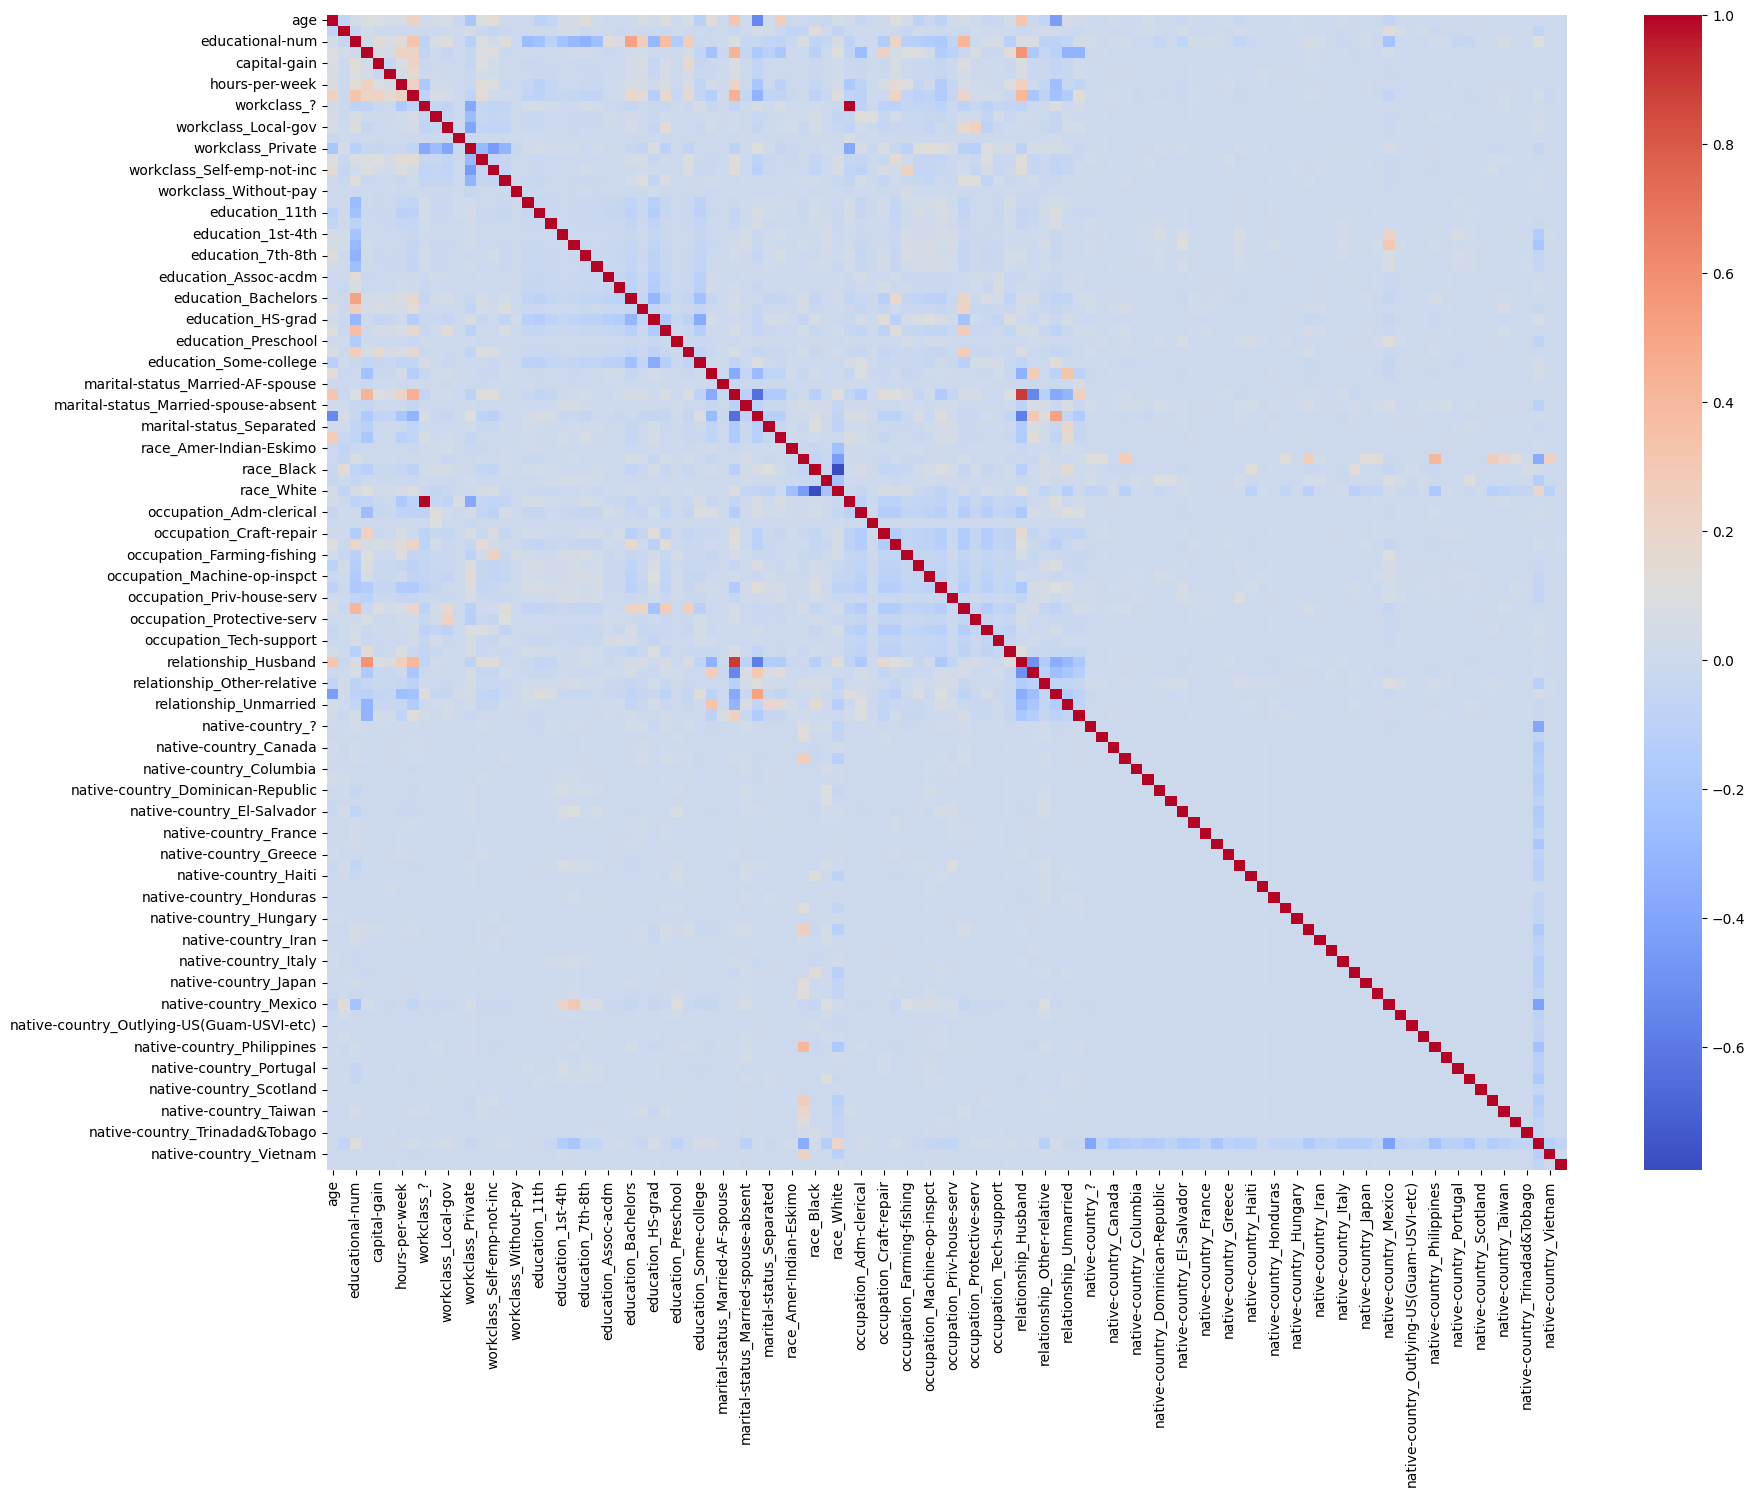

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

In [25]:
correlations = data.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(data.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
data_dropped = data.drop(cols_to_drop, axis=1)

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


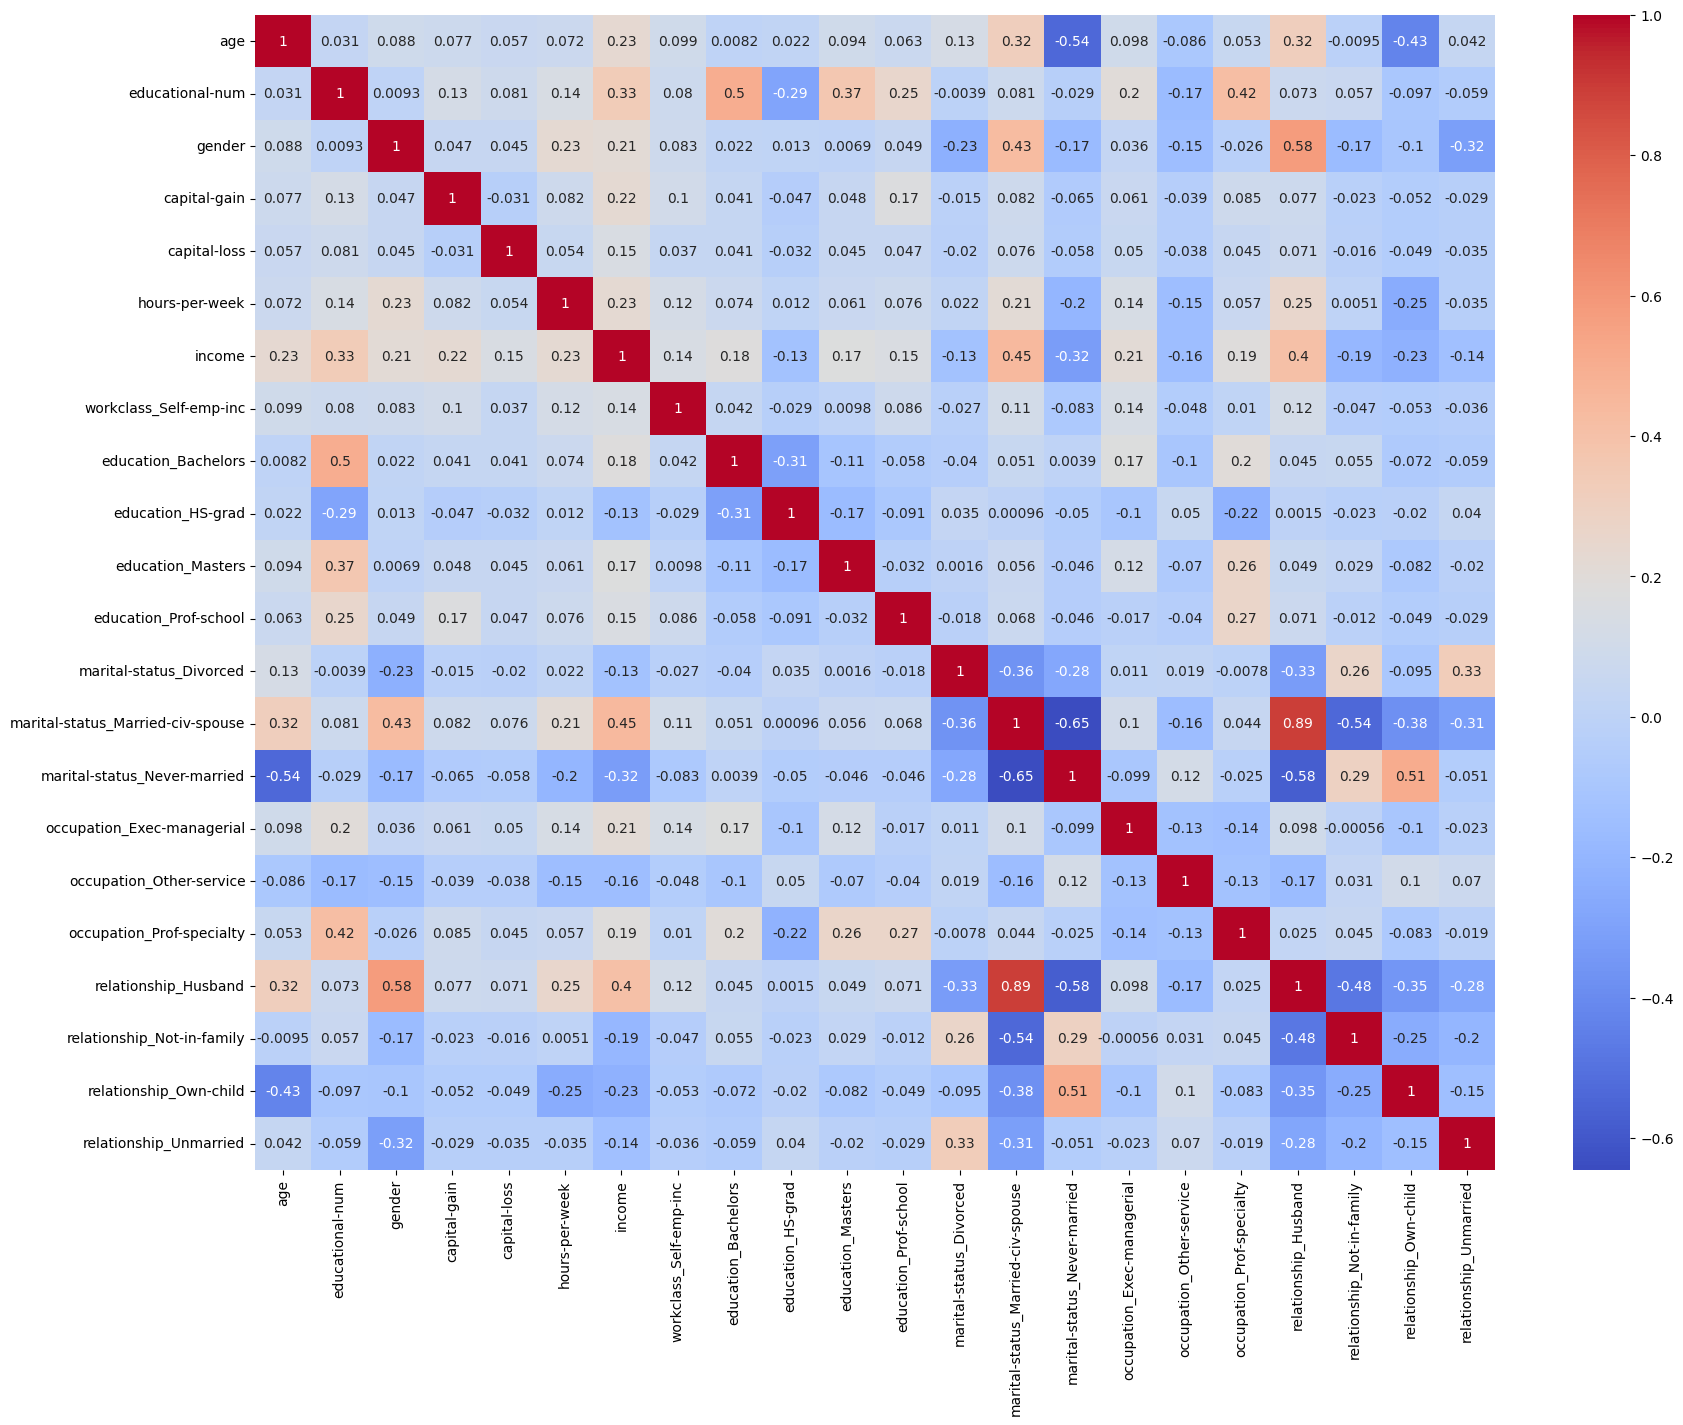

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(data_dropped.corr(), annot=True, cmap='coolwarm')
plt.show()

### Model Training


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [30]:
X, y = data.drop(['fnlwgt', 'educational-num', 'income'], axis=1), data['income']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
forest.score(X_test, y_test)

0.8472719828027434

In [37]:
feature_importances = dict(sorted(list(zip(forest.feature_names_in_, forest.feature_importances_)), key= lambda x: x[1], reverse=True))


In [38]:
feature_importances

{'age': np.float64(0.23061727579910057),
 'hours-per-week': np.float64(0.11642490930096892),
 'capital-gain': np.float64(0.1107687738935674),
 'marital-status_Married-civ-spouse': np.float64(0.07416052375529707),
 'relationship_Husband': np.float64(0.039199786086157117),
 'capital-loss': np.float64(0.03782602126975008),
 'marital-status_Never-married': np.float64(0.027233682580959196),
 'occupation_Exec-managerial': np.float64(0.023643041295198817),
 'occupation_Prof-specialty': np.float64(0.022080537118465977),
 'education_Bachelors': np.float64(0.021386793419638585),
 'gender': np.float64(0.01552471048902542),
 'education_Masters': np.float64(0.01517741746746832),
 'education_HS-grad': np.float64(0.013289829296199668),
 'relationship_Not-in-family': np.float64(0.01278944782159673),
 'relationship_Wife': np.float64(0.01114670684851954),
 'workclass_Private': np.float64(0.011131031201456374),
 'relationship_Own-child': np.float64(0.010293164292684748),
 'workclass_Self-emp-not-inc': np

### Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

In [42]:
"""
param_grid = {
    "n_estimators": [100, 150, 200, 250],
    "max_depth": [20, 30, 40, None],
    "min_samples_split": [2, 4],
    "max_features": ["sqrt", "log2"]
}

"""
param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [30, None],
    "min_samples_split": [2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                            verbose=10 )

In [43]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 1/5; 1/8] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.859 total time=   3.6s
[CV 2/5; 1/8] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 2/5; 1/8] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.851 total time=   3.6s
[CV 3/5; 1/8] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 3/5; 1/8] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.858 total time=   3.9s
[CV 4/5; 1/8] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 4/5; 1/8] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.862 total time=   3.6s
[CV 5/5; 1/8] START max_depth=30, min_samples_split=2, n_estimators=100.........
[CV 5/5; 1/8] END max_depth=30, min_samples_split=2, n_estimators=100;, score=0.857 total time=   3.7s
[CV 1/5; 2/8] START 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, None], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 150]},
             verbose=10)

In [44]:
forest = grid_search.best_estimator_
forest

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=150)

In [45]:
forest.score(X_test, y_test)

0.858941549800389

In [46]:
feature_importances = dict(sorted(list(zip(forest.feature_names_in_, forest.feature_importances_)), key= lambda x: x[1], reverse=True))
feature_importances

{'age': np.float64(0.14760929536413298),
 'capital-gain': np.float64(0.13306872431237152),
 'marital-status_Married-civ-spouse': np.float64(0.091585511183397),
 'hours-per-week': np.float64(0.09082174388432092),
 'relationship_Husband': np.float64(0.058548657932589024),
 'capital-loss': np.float64(0.04320920530791188),
 'marital-status_Never-married': np.float64(0.03890758053160505),
 'occupation_Exec-managerial': np.float64(0.030447449742439),
 'education_Bachelors': np.float64(0.026907020668230783),
 'occupation_Prof-specialty': np.float64(0.02587370984069644),
 'education_Masters': np.float64(0.01878823248844567),
 'relationship_Not-in-family': np.float64(0.015544525261700578),
 'gender': np.float64(0.014601330786131203),
 'education_HS-grad': np.float64(0.014275175554793433),
 'relationship_Own-child': np.float64(0.014135896000627422),
 'relationship_Wife': np.float64(0.011961009651163045),
 'education_Prof-school': np.float64(0.011384033469789452),
 'workclass_Private': np.float64

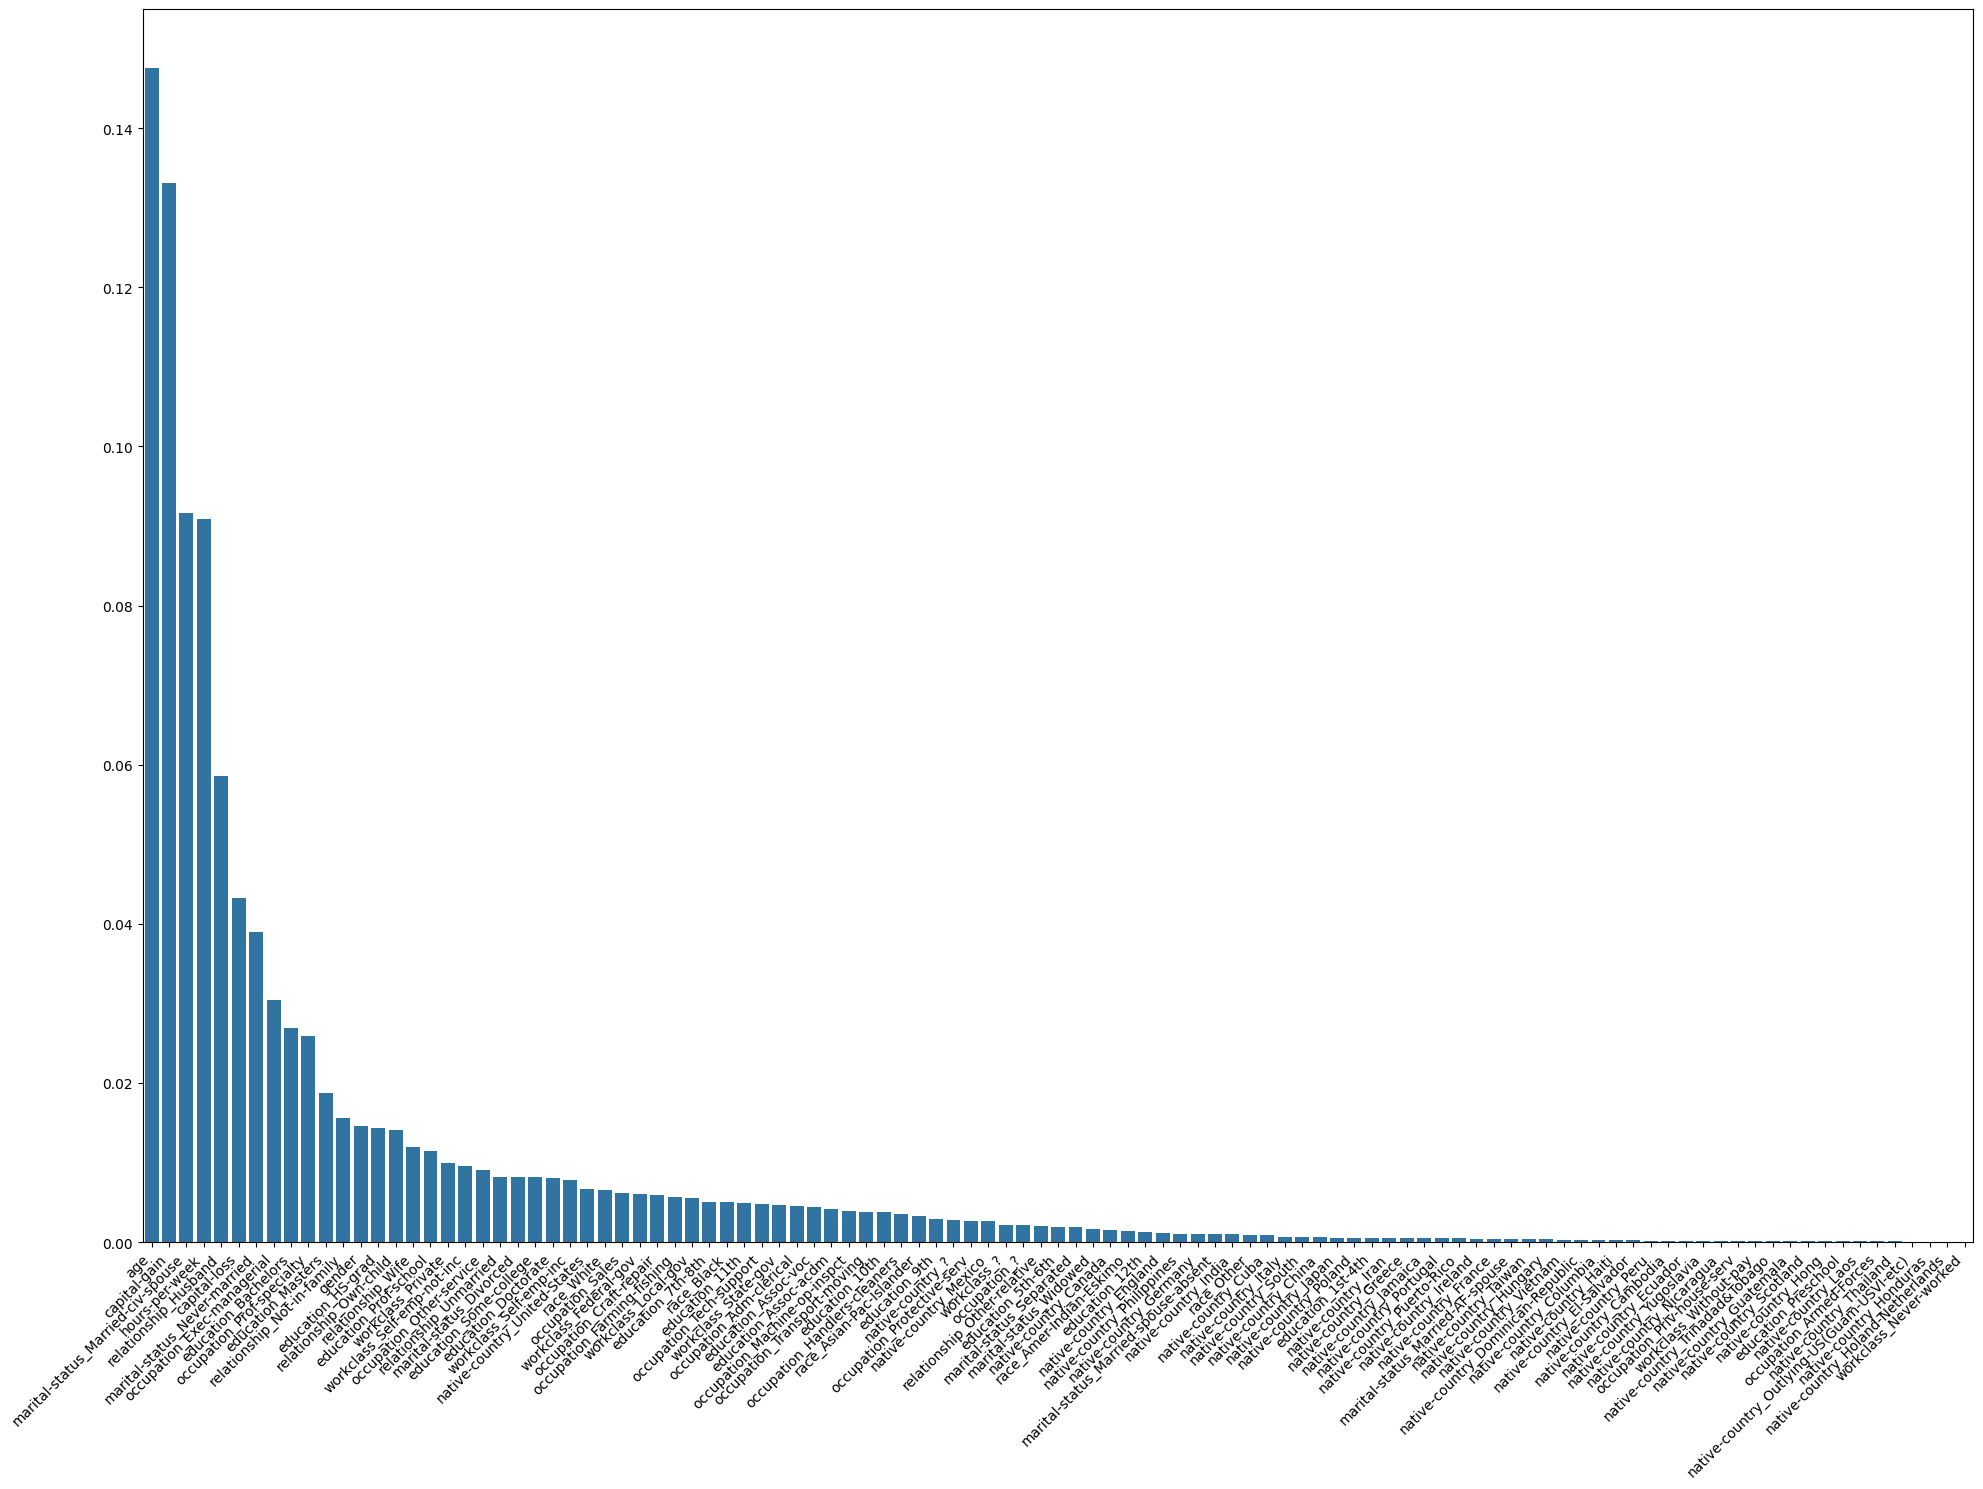

In [51]:
plt.figure(figsize=(20,15))
sns.barplot(x=feature_importances.keys(), y= feature_importances.values())
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

